NLP_df_labeled 
ggl sheet: NLP_df_unlimit_final_more_for_upload     


In [7]:
'''! pip install pandas
! pip install keras
! pip install pythainlp
! pip install scikit-learn
! pip install numpy
! pip install matplotlib
! pip install seaborn
! pip install pythainlp python-crfsuite'''


'! pip install pandas\n! pip install keras\n! pip install pythainlp'

In [2]:
import os
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import load_model
from pythainlp.tokenize import word_tokenize, word_detokenize
from sklearn.metrics import confusion_matrix
from pythainlp.corpus import thai_stopwords

In [3]:
def stopwords_rm(text):
    stopwords = set(thai_stopwords())
    stopwords.update(["nan", "-", "_", "", " ", "฿" ,"ค่ะ", "ครับ", "จ้า"])  # Add more stopwords as needed


    # Remove stopwords from the text
    cleaned_text = ' '.join(word for word in text.split() if word not in stopwords)
    return cleaned_text


def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

In [4]:
df_all = pd.read_csv("./TestNLP_labeled_lstm.csv")
df_org = df_all[df_all['relevant'] == True]


In [5]:
df_all['org'].value_counts() #org can only be English

org
department of public work    53
municipal office             31
police department            17
Name: count, dtype: int64

In [6]:
df_a = df_org
                
df_a['split_text'] = df_a.apply(lambda row: word_tokenize(row['tweet_text'],engine="newmm",keep_whitespace=False), axis=1) #use this
df_a['combined'] = [' '.join(lst) for lst in df_a['split_text']]
df_a['cleaned'] = df_a['combined'].apply(deEmojify)
df_a['cleaned'] = df_a['cleaned'].apply(stopwords_rm) 
df_a['split_cleaned'] = df_a.apply(lambda row: word_tokenize(row['cleaned'],engine="newmm",keep_whitespace=False), axis=1)

#newmm cuts better than nemm-safe ศร, ีฯ ค่,ะ #attacut is virus
#try other engine or break larger, add space in between  
#df_a['split_text2'] = df_a.apply(lambda row: word_tokenize(row['tweet_text'],engine="newmm-safe",keep_whitespace=False), axis=1)'''

C:\Users\natkn\AppData\Local\Temp\ipykernel_10636\2482613414.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['split_text'] = df_a.apply(lambda row: word_tokenize(row['tweet_text'],engine="newmm",keep_whitespace=False), axis=1) #use this
C:\Users\natkn\AppData\Local\Temp\ipykernel_10636\2482613414.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['combined'] = [' '.join(lst) for lst in df_a['split_text']]
C:\Users\natkn\AppData\Local\Temp\ipykernel_10636\2482613414.py:5: SettingWithCopyWarnin

https://pythainlp.github.io/dev-docs/api/tokenize.html

In [7]:
df_a['word_length'] = df_a['split_cleaned'].str.len()

C:\Users\natkn\AppData\Local\Temp\ipykernel_10636\1034605477.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_a['word_length'] = df_a['split_cleaned'].str.len()


In [8]:
df_a

,index,username,tweet_id,tweet_text,org,relevant,category,query,datetime_of_tweet,datetime_of_query,link,mentioned_location,location,image,split_text,combined,cleaned,split_cleaned,word_length
0,40,dohyunjinmin,1723873392980578712,เคยเดินจาก bts วัดพระศรีฯไปสายสีแดงหลักสี่ ระย...,department of public work,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ประ...",2023-11-13 1:20:19,2023-11-16 15:25:10,https://twitter.com/dohyunjinmin/status/172387...,พระนคร,0.0,[],"[เคย, เดิน, จาก, bts, วัด, พระ, ศรี, ฯ, ไป, สา...",เคย เดิน จาก bts วัด พระ ศรี ฯ ไป สาย สีแดง หล...,เดิน bts วัด พระ ศรี สาย สีแดง หลัก สี่ ระยะทา...,"[เดิน, bts, วัด, พระ, ศรี, สาย, สีแดง, หลัก, ส...",31
1,48,Simmons37496127,1723769675656679557,เคยเดินจากเซนทรัลลาดพร้าวไปพหลโยธิน 34 คือไม่...,police department,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""กรุ...",2023-11-12 18:28:11,2023-11-16 14:52:12,https://twitter.com/Simmons37496127/status/172...,ลาดพร้าว,NaN,[],"[เคย, เดิน, จาก, เซ, นท, รัล, ลาดพร้าว, ไป, พห...",เคย เดิน จาก เซ นท รัล ลาดพร้าว ไป พหลโยธิน 34...,เดิน เซ นท รัล ลาดพร้าว พหลโยธิน 34 ไหว พัง อา...,"[เดิน, เซ, นท, รัล, ลาดพร้าว, พหลโยธิน, 34, ไห...",27
2,56,xbiiryxxn,1723707515551314342,เคยเดินจากห้วยขวางไปสุทธิสาร สรุปเดินเหยียบฟุต...,department of public work,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ห้ว...",2023-11-12 14:21:11,2023-11-16 15:20:42,https://twitter.com/xbiiryxxn/status/172370751...,ห้วยขวาง,NaN,[],"[เคย, เดิน, จาก, ห้วยขวาง, ไป, สุทธิ, สาร, สรุ...",เคย เดิน จาก ห้วยขวาง ไป สุทธิ สาร สรุป เดิน เ...,เดิน ห้วยขวาง สุทธิ สาร สรุป เดิน เหยียบ ฟุตบา...,"[เดิน, ห้วยขวาง, สุทธิ, สาร, สรุป, เดิน, เหยีย...",19
3,62,BAROCTARISREAL,1723676568256680410,อยู่เกาหลีเดินสะบัด แดกเท่าไหรก็ นน ไม่ขึ้น กล...,department of public work,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ห้ว...",2023-11-12 12:18:12,2023-11-16 15:20:42,https://twitter.com/BAROCTARISREAL/status/1723...,ห้วยขวาง,NaN,[],"[อยู่, เกาหลี, เดิน, สะบัด, แดก, เท่า, ไห, ร, ...",อยู่ เกาหลี เดิน สะบัด แดก เท่า ไห ร ก็ นน ไม่...,เกาหลี เดิน สะบัด แดก ไห ร นน กลับมา ไทย เดิน ...,"[เกาหลี, เดิน, สะบัด, แดก, ไห, ร, นน, กลับมา, ...",36
4,68,ssssxsaii,1723591895224656205,บรรทัดทองจะน่าเดินกว่านี้ถ้า\n-ทำทางเดินใหม่ไม...,municipal office,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""นคร...",2023-11-12 6:41:45,2023-11-16 15:43:02,https://twitter.com/ssssxsaii/status/172359189...,บรรทัดทอง,NaN,[],"[บรรทัด, ทอง, จะ, น่า, เดิน, กว่า, นี้, ถ้า, \...",บรรทัด ทอง จะ น่า เดิน กว่า นี้ ถ้า \n - ทำ ทา...,บรรทัด ทอง เดิน ทำ ทางเดิน แผ่น พื้น กระดก ท่อ...,"[บรรทัด, ทอง, เดิน, ทำ, ทางเดิน, แผ่น, พื้น, ก...",30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1003,noknok169,1701508987211116570,มีคนบอกว่าส่วนที่เป็นสีเหลืองมีลักษณะขรุขระแบบ...,department of public work,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ราช...",2023-09-12 8:12:09,2023-11-16 16:06:14,https://twitter.com/noknok169/status/170150898...,รามคำแหง,NaN,[],"[มี, คน, บอ, กว่า, ส่วน, ที่, เป็น, สีเหลือง, ...",มี คน บอ กว่า ส่วน ที่ เป็น สีเหลือง มี ลักษณะ...,คน บอ สีเหลือง ลักษณะ ขรุขระ แบบนี้ ทางเดิน ฟุ...,"[คน, บอ, สีเหลือง, ลักษณะ, ขรุขระ, แบบนี้, ทาง...",24
97,1005,Poor__cherry,1701501439196184947,ห้วยขวางบ่อย ทั้งจีนทั้งไทยขับรถตัวเฮียเกินขึ้...,police department,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ห้ว...",2023-09-12 7:42:10,2023-11-16 15:20:42,https://twitter.com/Poor__cherry/status/170150...,ห้วยขวาง,NaN,[],"[ห้วยขวาง, บ่อย, ทั้ง, จีน, ทั้ง, ไทย, ขับรถ, ...",ห้วยขวาง บ่อย ทั้ง จีน ทั้ง ไทย ขับรถ ตัว เฮีย...,ห้วยขวาง จีน ไทย ขับรถ ตัว เฮีย จอด ฟุตบาท,"[ห้วยขวาง, จีน, ไทย, ขับรถ, ตัว, เฮีย, จอด, ฟุ...",8
98,1008,UncleHamzter,1701441389853307124,รีวิว แจ้งวิ่งบนฟุตบาท แจ้งไปกว่า 50 เคส เพิ่ง...,municipal office,True,ทางเท้า,"(""ทางเท้า"" OR ""ทางเดิน"" OR ""ฟุตบาท"") AND (""ประ...",2023-09-12 3:43:33,2023-11-16 15:25:10,https://twitter.com/UncleHamzter/status/170144...,คล

In [9]:
df_a['word_length'].sort_values(ascending=False) 

43     44
55     43
23     42
548    41
6      41
       ..
20     10
94     10
66     10
97      8
72      8
Name: word_length, Length: 101, dtype: int64

In [15]:
from pythainlp.word_vector import WordVector
from keras.preprocessing.sequence import pad_sequences

# Assuming you have loaded your text data into a Pandas DataFrame named df
# and you have initialized the WordVector model
wv = WordVector()

# Process text data into sequences of word vectors
X_sequences = []
for text in df_a['cleaned']:
    word_vectors = []
    for word in text.split():
        try:
            word_vector = wv.sentence_vectorizer(word)
            word_vectors.append(word_vector)
        except KeyError:
            # Handle out-of-vocabulary words
            pass
    X_sequences.append(word_vectors)

# Pad sequences to ensure uniform length
MAX_SEQUENCE_LENGTH = 300  # Length of each sequence
X_sequences = pad_sequences(X_sequences, maxlen=MAX_SEQUENCE_LENGTH, dtype='float32', padding='post', truncating='post')

# Now X_sequences contains the processed text data as sequences of word vectors with a length of 300
# You can use X_sequences as input to train your LSTM model


In [36]:
import pandas as pd
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.layers import Reshape
'''
MAX_WORDS = 2500
EMBEDDING_DIM = 301'''
MAX_SEQUENCE_LENGTH = 301

word2vec = wv.get_model()
vocab_len = len(word2vec.index_to_key) + 1                  # adding 1 to fit Keras embedding (requirement)
emb_dim = 300
# Assuming you have loaded your data into a DataFrame named df
# and you have already converted text data into sequences of word vectors

# Tokenize and pad sequences
X = pad_sequences(X_sequences, maxlen=MAX_SEQUENCE_LENGTH)

# Encode categorical labels
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(df_a['org'])

# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=42) #for this small data use 0.1 for larger use 0.3 or 0.2 might better
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)


model = Sequential()
model.add(Embedding(input_dim=vocab_len, output_dim=emb_dim, input_length=MAX_SEQUENCE_LENGTH))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))

# Reshape the output of LSTM layer to add extra dimensions
model.add(Reshape((MAX_SEQUENCE_LENGTH, 1, 1, 100)))  # Adjust dimensions as needed

# Add a Dense layer for classification
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

# Compile model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train model
history = model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.1)


ValueError: Exception encountered when calling layer "reshape_1" (type Reshape).

total size of new array must be unchanged, input_shape = [100], output_shape = [301, 1, 1, 100]

Call arguments received by layer "reshape_1" (type Reshape):
  • inputs=tf.Tensor(shape=(None, 100), dtype=float32)

In [ ]:
# Evaluate model
accr = model.evaluate(X_test, Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0], accr[1]))

# Get predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Print classification report
print(classification_report(np.argmax(Y_test, axis=1), y_pred_classes))

1/1 [==============================] - 0s 39ms/step - loss: 2.3115 - accuracy: 0.5484
Test set
  Loss: 2.311
  Accuracy: 0.548
1/1 [==============================] - 0s 231ms/step


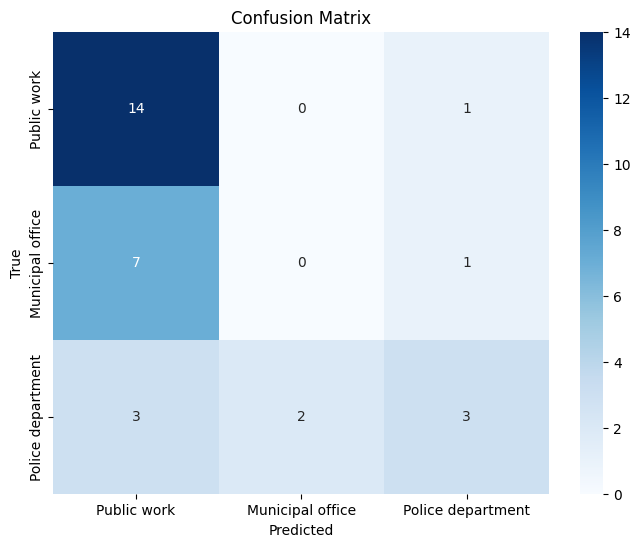

In [23]:
accr = model.evaluate(X_test, Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0], accr[1]))

# Get predictions for the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(np.argmax(Y_test, axis=1), y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Public work', 'Municipal office', 'Police department'], 
            yticklabels=['Public work', 'Municipal office', 'Police department'])

plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()



thai2fit

In [35]:
#! pip install gensim
#! pip install pythainlp
from pythainlp.word_vector import WordVector
#default is thai2fit
wv = WordVector()
sentence = 'อ้วน ร้าวราน'
a = wv.sentence_vectorizer(sentence, use_mean=True)
print(a.shape) #(1, 300)
print(type(a)) #numpy.ndarray
print(a)

(1, 300)
<class 'numpy.ndarray'>
[[-2.38209988e-02 -2.42590010e-02  3.06303327e-02 -3.30546672e-02
   8.11006675e-02 -2.65779992e-02 -7.56306648e-02  4.18516646e-02
  -2.71650006e-02  9.65033347e-03  8.66419971e-02 -3.73410011e-02
   1.36953662e-01 -3.80389988e-02  1.56713339e-02 -8.48399997e-02
   2.75703346e-02 -5.76006671e-02 -1.59157336e-01  6.24756664e-02
   8.33900024e-03  7.78809985e-02 -1.92316671e-02  5.24933338e-02
   4.94333326e-03 -1.12839999e-02 -1.39563332e-02 -7.04933355e-02
  -3.19663336e-02 -1.59491330e-01 -4.50643351e-02  8.42946668e-02
  -7.87033327e-03 -7.48666674e-02  5.11739999e-02  4.83466654e-03
   1.47536670e-02  1.06756330e-01 -2.51836677e-02  3.90643328e-02
   1.86793332e-02 -1.71279994e-02 -5.41436672e-02 -7.33510007e-02
   3.03403338e-02 -6.66533348e-03  1.91160006e-02 -2.26483345e-02
  -3.26806655e-02  3.95833328e-02 -1.02797002e-01 -1.14653001e-01
   5.68706691e-02  1.39666663e-04  1.89430006e-02  6.62686676e-02
  -4.43159988e-02 -6.62486653e-02  5.978433

In [13]:
model.save_weights('org_model_weights.h5')

Using

In [ ]:
X_test=['อย่า ลืม ติดตาม ชม รายการ พิเศษ','ด่วน ลด แบบ จัดเต็ม ของแถม มากมาย']
X_test=tokenizer.texts_to_sequences(X_test)
X_test=pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)
model.predict(X_test)

End.................................................

In [39]:
Y # public work (โยธา), municipal office (เทศกิจ) ,police department

array([[ True, False, False],
       [False, False,  True],
       [ True, False, False],
       ...,
       [False, False, False],
       [False, False, False],
       [False, False, False]])

In [42]:
df_a.cleaned.values[1]

'เดิน เซ นท รัล ลาดพร้าว พหลโยธิน 34 ไหว พัง อากาศ กทม เดิน หนัก มอ ไซ ขับ ฟุต บาต เเล้ว เ เร ง เหมือน เกะกะ ทางเดิน อันนี้ แก้'

In [33]:
X.shape #after padding sentence, input

(553, 63)

In [32]:
X #after padding

array([[   0,    0,    0, ...,  248,   84,  163],
       [   0,    0,    0, ...,    2,  472,  414],
       [   0,    0,    0, ...,  416, 1681,  828],
       ...,
       [   0,    0,    0, ...,  251,  105,  501],
       [   0,    0,    0, ...,   29, 1470, 1646],
       [   0,    0,    0, ...,  360,  183,  891]])

In [29]:
X[76] #before padding

[912,
 558,
 14,
 14,
 1219,
 706,
 31,
 110,
 1888,
 4,
 1220,
 913,
 158,
 1889,
 236,
 1221,
 88,
 1222,
 1,
 565,
 374,
 914,
 115]

In [30]:
tokenizer.word_index

{'เดิน': 1,
 'ทางเดิน': 2,
 'ฟุตบาท': 3,
 'ทางเท้า': 4,
 'ถนน': 5,
 'คน': 6,
 '2': 7,
 'แถว': 8,
 'เขต': 9,
 'ทำ': 10,
 'รถ': 11,
 'บริเวณ': 12,
 'น้ำท่วม': 13,
 'ซอย': 14,
 'ติด': 15,
 '1': 16,
 'น้ำ': 17,
 'แยก': 18,
 'ดี': 19,
 'กุ': 20,
 'เจอ': 21,
 '3': 22,
 '\u200b': 23,
 'ริม': 24,
 'สาย': 25,
 'ร้าน': 26,
 'ปัญหา': 27,
 'คลอง': 28,
 'สถานี': 29,
 'ดู': 30,
 'หน้า': 31,
 'โซน': 32,
 'พระ': 33,
 'จอด': 34,
 'บ้าน': 35,
 'เรื่อง': 36,
 'สุขุมวิท': 37,
 'อะ': 38,
 'อโศก': 39,
 'ม': 40,
 '4': 41,
 'กทม': 42,
 'พื้นที่': 43,
 'ทอง': 44,
 'ขาย': 45,
 'ลาดพร้าว': 46,
 '…': 47,
 'ส': 48,
 'จุด': 49,
 'สวน': 50,
 'เหมือน': 51,
 'นั่ง': 52,
 'ท่วม': 53,
 'ชุด': 54,
 'ประตู': 55,
 'สีลม': 56,
 'ฝนตก': 57,
 'น': 58,
 'ใบ': 59,
 'โรงพยาบาล': 60,
 'ฝน': 61,
 'ตอน': 62,
 'อากาศ': 63,
 'งาน': 64,
 'เส้น': 65,
 'รู้': 66,
 'บางนา': 67,
 '5': 68,
 'หัวใจ': 69,
 'บัตร': 70,
 'ชั้น': 71,
 'ยืน': 72,
 '2566': 73,
 'รถไฟฟ้า': 74,
 'ชอบ': 75,
 'สังคม': 76,
 'เมือง': 77,
 'ความดี': 78,
 'หลัก': 79,
 'ต

In [101]:
df_a.to_csv('./compare1.csv', index=False) # , header=False)